# 알라딘 베스트셀러 정보 크롤링

## 1. 알라딘 베스트셀러 1위 도서 책 제목 가져오기

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
import requests
from bs4 import BeautifulSoup

bestsales = {'title' : []}

url = f'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0%27'
resp = requests.get(url)
soup = BeautifulSoup(resp.content, 'lxml')
    # 2-1) 태그 파싱
bestsales_tags = soup.select('a.bo3')
    # 2-2) 데이터 파싱
for bestsale in bestsales_tags:
    bestsales['title'].append(bestsale.text)

print(bestsales['title'][0])

결국 국민이 합니다 : 이재명의 인생과 정치철학


In [ ]:
()

'소년이 온다'

select의 반환은 리스트다.

## 2. 알라딘 베스트셀러 top50 종합 도서 _ 제목, 작가, 가격

### 2-1. 종합 top50 도서 _ 제목과 가격 정보만 가져오기
- 작가 정보가 까다로움

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
bestsales = {'title' : []}
costs = {'cost': []}
authors = {'author': []}

url = f'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0'
resp = requests.get(url)
soup = BeautifulSoup(resp.content, 'lxml')

bestsales_tags = soup.select('a.bo3')
    # 2-2) 데이터 파싱
for bestsale in bestsales_tags:
    bestsales['title'].append(bestsale.text)
print(bestsales)

cost_tags = soup.select('span.ss_p2')
for cost in cost_tags:
    costs['cost'].append(cost.text)
print(costs)

authors_tags = soup.select('div.ss_book_list a')
for author in authors_tags:
    authors['author'].append(author.text)
print(authors['author'][2::7])

{'title': ['결국 국민이 합니다 : 이재명의 인생과 정치철학', '청춘의 독서 (특별증보판)', '빛과 실', '이재명의 길', '단 한 번의 삶', '소년이 온다', '혼모노', '흔한남매 19', '첫 여름, 완주', '이로운 보수 의로운 진보', '싯다르타 (먼슬리 클래식）', '행동은 불안을 이긴다', '바움가트너', '모순', '파과 (리커버, 영화표지)', '밥을 지어요', '스토너', '2025 제16회 젊은작가상 수상작품집', '백날 지워봐라, 우리가 사라지나', '2025 큰별쌤 최태성의 별★별한국사 기출 500제 한국사능력검정시험 심화 (1, 2, 3급)', '대통령 윤석열 탄핵 사건 선고 결정문', '작별하지 않는다', '40세 정신과 영수증', '초역 부처의 말', '듀얼 브레인', '위버멘쉬', '채식주의자 (리마스터판)', '흔한남매 과학 탐험대 14 : 화학 반응', '2025 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 하', '2025 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 상', '내일도 흔들릴 나에게', '과자 사면 과학 드립니다', '급류', 'ETS 토익 정기시험 기출문제집 1000 Vol. 4 Reading (리딩)', '비밀 맛집 크앙 식당 1', '파쇄', '넥서스', '쇼펜하우어 인생수업 (리커버 에디션)', '원펀맨 One Punch Man 32', 'ETS 토익 정기시험 기출문제집 1000 Vol. 4 Listening (리스닝)', '주술회전 29 트리플 특장판', '줬으면 그만이지', '흔한남매의 흔한 호기심 13', '책문, 이 시대가 묻는다', '내 마음의 위험한 녀석 11 (한정판)', '함께 가는 길은 외롭지 않습니다', '나쁜 유적지들', '흔한남매 18', '읽으면서 바로 써먹는 어린이 OX 퀴즈', '부서지는 아이들']}
{'cost': ['19,800원', '17,010원', '13,500원', '16,200원', '15,120원'

In [ ]:
import requests
from bs4 import BeautifulSoup

### 2-2. 첫번째 도서의 작가 정보만 가져오기
- 까다로운 이유 : li태그가 여러개 있다. 그 중 세번째 li태그에 작가정보가 있다.
- 인덱싱을 이용해 각 묶음의 3번째꺼만 뽑아내보자.

In [ ]:
bbox_tags = soup.select('div.ss_book_box') # 상위 클래스에서 가져옴
print(len(bbox_tags)) # 50개가 맞는지 확인

50


In [ ]:
for bbox_tag in bbox_tags: # 상위 클래스의 것을 for문으로 순회
    blist_tag = bbox_tag.select('div.ss_book_list')[0] # div에서 첫번째 것에 해당하여 지정
    li_author_tag = blist_tag.select('li')[-3] # ul> li 아래에서 3번째 것 확인하여 지정
    author_tag = li_author_tag.select('a')[0] # li tag에서 작가명은 첫번째 것
    author = author_tag.text #각 작가명 text로 추출
    print(author)

이재명
유시민
한강
박시백
최강욱
김영하
성해나
한강
김금희
헤르만 헤세
흔한남매
구병모
폴 오스터
롭 다이얼
양귀자
최나현
존 윌리엄스
최태성
백온유
김혜경
정신
코이케 류노스케
김태완
헌법재판소
한강
프리드리히 니체
한강
정윤선
이선 몰릭
흔한남매
최태성
ETS
최태성
정대건
ETS
아르투어 쇼펜하우어
구병모
권태영(탱로그)
유발 하라리
애비게일 슈라이어
김주완
남디디
박민경
안치현
망둥어
ONE
아쿠타미 게게
김종원
이재명
한강


In [ ]:
for bbox_tag in bbox_tags: # 상위 클래스의 것을 for문으로 순회
    blist_tag = bbox_tag.select('div.ss_book_list')[0] # div에서 첫번째 것에 해당하여 지정
    li_author_tag = blist_tag.select('li')[-3] # ul> li 아래에서 3번째 것 확인하여 지정
    author_tags = li_author_tag.select('a')[0] # a에 해당하는 자료 전체 추출
    authors = [] # 다중 작가 묶음을 위해 리스트 항목 생성
    for author_tag in author_tags:
        authors.append(author_tag.text)
    author = '|'.join(authors[:1])
print(authors)

['한강']


In [ ]:
authors = {'author': []}

url = f'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0'
resp = requests.get(url)
soup = BeautifulSoup(resp.content, 'lxml')

authors_tags = soup.select('div.ss_book_list a')
for author in authors_tags:
    authors['author'].append(author.text)
print(authors['author'][2:3])

['이재명']


### 2-3. 모든 도서의 작가 정보만 가져오기
- 더 까다로운 이유 : div.ss_book_list도 한 블럭에 2개씩 있으며, 어떤 블럭에는 li가 4개, 어떤 블럭에는 5개가 있다.
- 한번에 select하려고 하지말고, 나눠서 select를 여러번 하자.

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
aladins = {}

titles = []
costs = []
authors = []

url = f'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0'
resp = requests.get(url)
soup = BeautifulSoup(resp.content, 'lxml')

authors_tags = soup.select('div.ss_book_list a')
for author in authors_tags:
    authors.append(author.text[2:18:7])
print(authors)


['화  ', ' 다의', '명', '이', '3', '자', ' ', '카', '의별', '민', '지', '', '임 >', ' ', ' ', 'o', '', '과', '', '자', '화  ', '명', '백', '북', '4', '자', ' ', '운운', '욱', '혁', '레', '', '자', '   ', '한', 'o', '하', '서', '', '자', '  상', '노', 'o', '나', '', '', '자', ' ', '  상', '이', 'o', '', '', '9', '자', ' ', '모( ', '여', ' ', 'o', '희', '', '', '자', '화  ', '르 ', '리', '만', '준', '동', '', '남단2', '남', '남', '남', '도', '희', '컴', '엔', '', '자', '  상', ' 영', 'o', '모', '덤', '', '자', ' ', '오(함', '가', '오', '목', '책', '', ' ', '   ', '은긴', '다', '준', '독', '', '자', '  상', '', 'o', '자', '', '5', '자', '화  ', ' 우나', '현', '영', '희', '의', '', '자', '  상', '너', 'o', '윌', '욱', '이H', '6', '자', '본 ', '링머공', '2최별', '쌤별한', '성', '스', '자', ' 2가', '2 수', 'o', '유', '라', '원', '나', '령', '주', '정', '동', '', '자', ' ', ' ', 'o', '경', '사', '', '자', ' ', '증그트', '세수', '과', 'o', '', '이', '선', '기', '', '자', '화  ', ' ', '케', '현', '스', '', '자', ' ', '화  ', ', ', 'o', '완', '의', '', '민화', '령핵 ', '재', '먼', '', '자', ' ', '별>지', '하', 'o', '', '동', '1', '자', ' 

In [ ]:
bestsales = {'title' : []}
costs = {'cost': []}
authors = {'author': []}

url = f'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0'
resp = requests.get(url)
soup = BeautifulSoup(resp.content, 'lxml')

authors_tags = soup.select('div.ss_book_list a')
for author in authors_tags:
    authors['author'].append(author.text)
print(authors['author'][2:18:7])
print(authors['author'][22:32:8])
print(authors['author'][37:50:8])
print(authors['author'][53:57:1])
print(authors['author'][64:65:1])
print(authors['author'][69:71:1])
print(authors['author'][77:79:1])
print(authors['author'][83:85:1])
print(authors['author'][90:92:1])
print(authors['author'][97:115:7])
print(authors['author'][119:121:1])
print(authors['author'][128:135:1])
print(authors['author'][141:144:1])
print(authors['author'][150:160:5])
print(authors['author'][163:164:1])
print(authors['author'][172:175:1])
print(authors['author'][180:182:1])
print(authors['author'][189:191:1])
print(authors['author'][197:199:1])
print(authors['author'][207:208:1])
print(authors['author'][215:224:1])
print(authors['author'][230:255:7])
print(authors['author'][260:270:8])
print(authors['author'][282:283:1])
print(authors['author'][288:290:1])
print(authors['author'][297:299:1])
print(authors['author'][304:306:1])
print(authors['author'][311:312:1])
print(authors['author'][317:319:1])
print(authors['author'][324:325:1])
print(authors['author'][331:336:1])
print(authors['author'][342:343:1])
print(authors['author'][347:349:1])
print(authors['author'][353:354:1])
print(authors['author'][361:362:1])
print(authors['author'][368:372:1])
print(authors['author'][378:379:1])
print(authors['author'][383:385:1])

['이재명', '유시민', '한강']
['박시백', '한겨레출판']
['복복서가', '50']
['959', '양탄자배송', '보러 가기', '책 모양 보관함 (<첫 여름, 완주> 포함 국내도서 2만원 이상)']
['\r\n화제의 책 + 알라딘 굿즈 (이벤트 도서 포함 국내도서 3만원 이상)']
['문학동네', '16']
['흔한컴퍼니', '미래엔아이세움']
['Choice', '구병모']
['바움가트너', '폴 오스터']
['행동은 불안을 이긴다', '모순', '백날 지워봐라, 우리가 사라지나']
['스토너', 'Choice']
['2025 큰별쌤 최태성의 별★별한국사 기출 500제 한국사능력검정시험 심화 (1, 2, 3급)', '큰별쌤 최태성의 별★별한국사 한국사능력검정시험 시리즈 ', '최태성', '이투스북', '양탄자배송', '키캡 키링 (2025년 젊은작가상 포함 소설/시 15,000원 이상)', '2025 제16회 젊은작가상 수상작품집']
['이희주', '현호정', '문학동네']
['김영사', '40세 정신과 영수증']
['양탄자배송']
['\r\n화제의 책 + 알라딘 굿즈 (이벤트 도서 포함 국내도서 3만원 이상)', '책문, 이 시대가 묻는다', 'Choice']
['헌법재판소', '더휴먼']
['문학동네', '271']
['RISE(떠오름)', '123']
['167']
['풀빛', '14', '양탄자배송', '패브릭 금박 노트 (대상도서 포함 국내도서 3만원 이상)', '듀얼 브레인', 'Choice', '이선 몰릭', '신동숙', '상상스퀘어']
['흔한남매', '김희목', '큰별쌤 최태성의 별★별한국사 한국사능력검정시험 시리즈 ', 'ETS 토익 정기시험 기출문제집 ']
['이투스북', '민음사']
['아르투어 쇼펜하우어']
['파쇄', '위픽 ']
['빅피시', '양탄자배송']
['김영사', '38']
['이수경']
['줬으면 그만이지', '김주완']
['Choice']
['교양이 더 십대 17', 'Choice', '박민경', '다른'

### 2-4. 종합 top50 모든 도서의 제목, 작가, 가격 정보 csv로 저장하기
- 가격은 숫자로 변환하여 저장하자.

In [ ]:
import pandas as pd
df_aladin = pd.DataFrame(alradins)
df_aladin.to_csv('aladin_종합50.csv', encording ='utf-8-sig, index=False')

In [ ]:
bestsales = {'title' : []}
costs = {'cost': []}
authors = {'author': []}

url = f'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0'
resp = requests.get(url)
soup = BeautifulSoup(resp.content, 'lxml')

bestsales_tags = soup.select('a.bo3')
    # 2-2) 데이터 파싱
for bestsale in bestsales_tags:
    bestsales['title'].append(bestsale.text)
print(bestsales)

cost_tags = soup.select('span.ss_p2')
for cost in cost_tags:
    costs['cost'].append(cost.text)
print(costs)

authors_tags = soup.select('div.ss_book_list a')
for author in authors_tags:
    authors['author'].append(author.text)
print(authors['author'][2::7])

## 3. 알라딘 모든 카테고리 top 50 도서 정보가져오기
- 페이지 좌측에 있는 카테고리 목록 중 최상위 카테고리 기준으로 각 top 50 도서 가져오기

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url = f"https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=53516"

resp = requests.get(url)
resp

<Response [200]>

In [ ]:
soup = BeautifulSoup(resp.content, 'lxml')

bbox_tags = soup.select('div.ss_book_box') # 상위 클래스에서 가져옴
print(len(bbox_tags)) # 50개가 맞는지 확인

50


In [ ]:
aladins = {}
titles, authors, prices = [], [], []

for bbox_tag in bbox_tags:
    blist_tag = bbox_tag.select('div.ss_book_list')[0]

    # 제목
    li_tit_tag = blist_tag.select('li')[-4]
    tit_tag = li_tit_tag.select('a')[0]
    titles.append(tit_tag.text)

    # 작가
    li_aut_tag = blist_tag.select('li')[-3]
    aut_tags = li_aut_tag.select('a')[:-1]
    author = []
    for aut_tag in aut_tags:
        author.append(aut_tag.text)
    author = '|'.join(author)
    authors.append(author)

    # 가격
    li_prc_tag = blist_tag.select('li')[-2]
    prc_tag = li_prc_tag.select('em')[0]
    prices.append(int(prc_tag.text[:-1].replace(',', '')))
prices

[17100,
 20700,
 39600,
 16020,
 22500,
 34200,
 17820,
 26600,
 31350,
 26100,
 22500,
 15750,
 22500,
 25200,
 14400,
 14400,
 14400,
 12600,
 13500,
 22500,
 39600,
 22500,
 18000,
 43200,
 35000,
 15120,
 14400,
 16200,
 24300,
 20000,
 23750,
 12600,
 12600,
 25000,
 20000,
 18000,
 10800,
 29450,
 25200,
 15030,
 17910,
 27550,
 16200,
 36000,
 15300,
 22500,
 22500,
 14400,
 30400,
 22500]

In [ ]:
aladins['제목'] = titles
aladins['작가'] = authors
aladins['가격'] = prices

In [ ]:
import pandas as pd
df_aladin = pd.DataFrame(aladins)
df_aladin

,제목,작가,가격
0,80대20 러닝 훈련법,맷 피츠제럴드|최보배,17100
1,스포츠의학으로 읽는 발의 과학,손성준|이재훈,20700
2,호주물리치료사의 13가지 체형교정법,라이프에이드 연구소,39600
3,"마음이 요동칠 때, 기꺼이 나는 혼자가 된다",김지호,16020
4,스포츠의학이 쉬워지는 해부학 도감,우에하라 다케시|이진원|이시이 나오카타,22500
5,그림으로 요가하자 : 아사나 600,오연진,34200
6,"매일매일 암과 멀어지는 힐링 푸드, 근력 운동",오유경,17820
7,요가 디피카,B. K. S. 아헹가|현천,26600
8,그림으로 요가하자 : 궁금해요가,오연진,31350
9,운동 독립,구현경,26100


In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url = f"https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=1196"

resp = requests.get(url)
resp

<Response [200]>

In [ ]:
soup = BeautifulSoup(resp.content, 'lxml')

bbox_tags = soup.select('div.ss_book_box')
print(len(bbox_tags))

50


In [ ]:
aladins = {}
titles, authors, prices = [], [], []

for bbox_tag in bbox_tags:
    blist_tag = bbox_tag.select('div.ss_book_list')[0]

    #제목
    li_tit_tag = blist_tag.select('li')[-4]
    tit_tag = li_tit_tag.select('a')[0]
    titles.append(tit_tag.text)

    #작가
    li_aut_tag = blist_tag.select('li')[-3]
    aut_tags = li_aut_tag.select('a')[:-1]
    author = []
    for aut_tag in aut_tags:
        author.append(aut_tag.text)
    author = '|'.join(author)
    authors.append(author)

    #가격
    li_prc_tag = blist_tag.select('li')[-2]
    prc_tag = li_prc_tag.select('em')[0]
    prices.append(int(prc_tag.text[:-1].replace(',', '')))
print(prices)

[16200, 16200, 21420, 3920, 4500, 15120, 16200, 22320, 19800, 4500, 4320, 15750, 17820, 17820, 17820, 18900, 18900, 19800, 17820, 16020, 18000, 16200, 17100, 18000, 18900, 17820, 4320, 18000, 19800, 27000, 16920, 19800, 17100, 17820, 18000, 19800, 21600, 17820, 18900, 22500, 15750, 18000, 17100, 21420, 17820, 14850, 20700, 16200, 19800, 15300]


In [ ]:
aladins['순위'] = [f"{i+1}위" for i in range(len(titles))]
aladins['제목'] = titles
aladins['작가'] = authors
aladins['가격'] = prices

In [ ]:
import pandas as pd
df_aladin = pd.DataFrame(aladins)
df_aladin

,제목,작가,가격,순위
0,일본 현지 반찬 대백과,스가와라 요시미|김정원,16200,1위
1,줍는 순간,안희연,16200,2위
2,버터밀크 그래피티,에드워드 리|박아람,21420,3위
3,일본에서 한 달을 산다는 것,양영은|김민주|김일숙|임지현|한정규|전지혜|이다슬|박장희|이채안|최정은|우소연|손경...,3920,4위
4,교토커피,심재범,4500,5위
5,여행의 이유 (개정증보판),김영하,15120,6위
6,일본 명물 간식 백과 : 과자·디저트 편,여행과 철도 편집부|김나랑,16200,7위
7,"일상이 고고학, 나 혼자 서울 사찰 여행",황윤,22320,8위
8,디스 이즈 이탈리아 This is Italia,전혜진|윤도영|박기남,19800,9위
9,어느 중년의 일상 탈출 고백서,하이디 엘리어슨|이길태,4500,10위


In [ ]:
df_aladin.to_excel("aladin_여행 베스트셀러.xlsx", index=False)

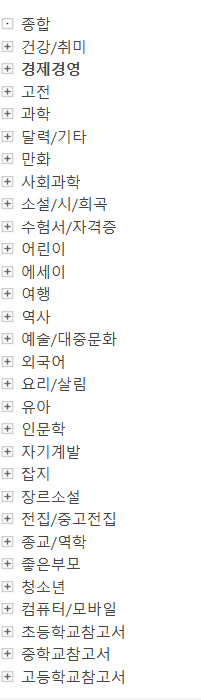

#### 여러 카테고리 페이지 url 가져오기
- 해당 url을 href 속성으로 갖고 있는 a_tag들을 먼저 가져오자
- a_tag에서 href 속성을 파싱하자

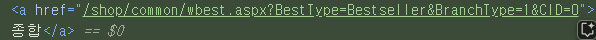

- 한가지 더 주의할 점
    - href가 full_url이 아님(리소스경로+쿼리스트링 뿐)
    - 이유 : 내부 이동이므로 (프로토콜 + 주소값 생략)
    - 대처 : 프로토콜 + 주소값은 따로 가져오기

In [ ]:
urls = {}

url = f'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0'


#### 저장된 url 리스트를 이용하여 반복 시행

## 4. 알라딘 도서 섬네일 가져오기

#### 이미지 크롤링의 이해  
html 안에 이미지는 없다. 이미지의 src만 있을 뿐.

- 1단계 : 섬네일 이미지 태그에서 img src 가져오기
- 2단계 : 이미지 src에 requests get하여 img 가져오기

#### 4-1) 하나의 도서를 정하여 해당 도서의 섬네일 이미지 저장하기

In [52]:
import requests
from bs4 import BeautifulSoup

In [98]:
url = "https://www.aladin.co.kr/shop/common/wbest.aspx?BranchType=1&start=we"

resp = requests.get(url)
resp

<Response [200]>

In [99]:
soup = BeautifulSoup(resp.content, 'lxml')

img_tags = soup.select('img.front_cover')

In [105]:
len(img_tags)
#print(img_tags)
img_tags

[<img class="front_cover i_cover" src="https://image.aladin.co.kr/product/36209/99/cover200/899778062x_1.jpg"/>,
 <img class="front_cover i_cover" src="https://image.aladin.co.kr/product/36286/32/cover200/s372039570_1.jpg"/>,
 <img class="front_cover i_cover" src="https://image.aladin.co.kr/product/36292/22/cover200/8932043566_1.jpg"/>,
 <img class="front_cover i_cover" src="https://image.aladin.co.kr/product/36292/90/cover200/k502038145_2.jpg"/>,
 <img class="front_cover i_cover" src="https://image.aladin.co.kr/product/36101/66/cover200/893643974x_2.jpg"/>,
 <img class="front_cover i_cover" src="https://image.aladin.co.kr/product/36114/12/cover200/s602038067_1.jpg"/>,
 <img class="front_cover i_cover" src="https://image.aladin.co.kr/product/36159/64/cover200/k012038787_1.jpg"/>,
 <img class="front_cover i_cover" src="https://image.aladin.co.kr/product/36275/58/cover200/k692038832_2.jpg"/>,
 <img class="front_cover i_cover" src="https://image.aladin.co.kr/product/4086/97/cover200/89364

In [121]:
srcs = []
for i in range(len(img_tags)):
    img_src = img_tags[i]
    srcs.append(img_src['src'])
# print(srcs)
for s in range(len(srcs)):
    resp = requests.get(srcs[s])


In [97]:
with open (f"/content/img_tag{s:02}.jpg", 'wb') as f:
    f.write(resp.content)

새폴더 만들기

In [96]:
!mkdir content

#### 4-2) 종합 top50 페이지의 섬네일 이미지 저장하기

- 종합_top50이라는 폴더에 저장

#### 4-3) 모든 카테고리의 모든 도서 섬네일 이미지 저장하기

In [157]:
import requests
from bs4 import BeautifulSoup

In [160]:
url = "https://www.aladin.co.kr/shop/common/wbest.aspx?BranchType=1&start=we"

resp = requests.get(url)
resp

0


In [162]:
bbox_categorys = soup.select('best_left') # 상위 클래스에서 가져옴
print(len(bbox_categorys))
#len(img_tags)
#print(img_tags)
#img_tags

0
